(a) Using NumPy, compute a normalized 5×5 Gaussian kernel for σ = 2.

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernal(size ,sigma):
    k = size // 2
    x = np.linspace(-k, k, size)
    y = np.linspace(-k, k, size)

    yy, xx = np.meshgrid(x, y)
    # ignore the constant factor
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    #normalize the kernel
    kernel = kernel / np.sum(kernel)
    return kernel, xx, yy

# compute 5*5 Gaussian kernel with sigma=2
kernel, xx, yy = gaussian_kernal(5, 2)
kernel

array([[0.02324684, 0.03382395, 0.03832756, 0.03382395, 0.02324684],
       [0.03382395, 0.04921356, 0.05576627, 0.04921356, 0.03382395],
       [0.03832756, 0.05576627, 0.06319146, 0.05576627, 0.03832756],
       [0.03382395, 0.04921356, 0.05576627, 0.04921356, 0.03382395],
       [0.02324684, 0.03382395, 0.03832756, 0.03382395, 0.02324684]])

In [6]:
np.sum(kernel)

np.float64(1.0)

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ywcha\AppData\Local\Temp\ipykernel_25824\1631700059.py:18: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'3D Gaussian Kernel ({size}x{size}, $\sigma$={sigma})')


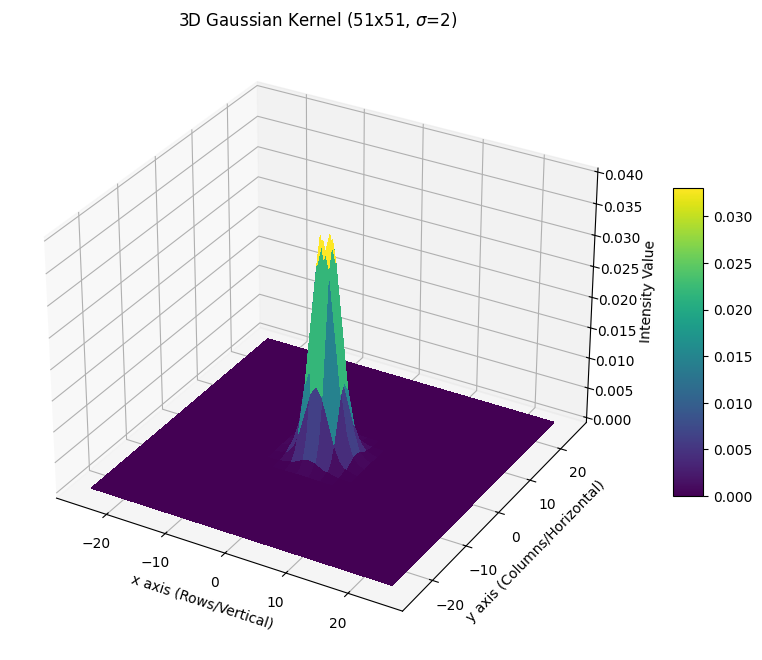

In [ ]:
# ---  Generate the 51x51 Kernel ---
sigma = 2
size = 51
kernel_51, xx, yy = gaussian_kernal(size, sigma)

# ---  Create the 3D Plot ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(xx, yy, kernel_51, cmap='viridis', linewidth=0, antialiased=False)

# --- Label the Axes  ---
ax.set_xlabel('x axis (Rows/Vertical)')
ax.set_ylabel('y axis (Columns/Horizontal)')
ax.set_zlabel('Intensity Value')
ax.set_title(f'3D Gaussian Kernel ({size}x{size}, $\sigma$={sigma})')

# Add a color bar to show values
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

part c

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ywcha\AppData\Local\Temp\ipykernel_25824\3487001478.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Smoothed with Manual Kernel (5x5, $\sigma$={sigma})")


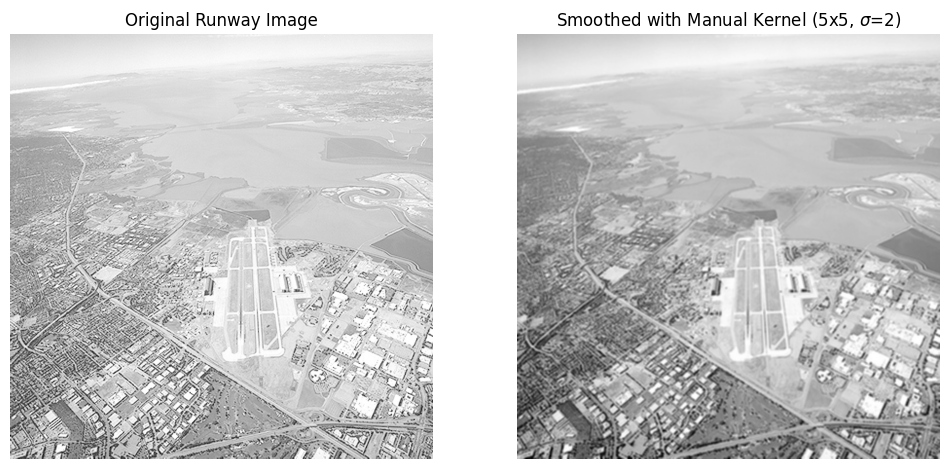

In [12]:
img = cv.imread('media/runway.png', cv.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Image not found.")
else:
    sigma = 2
    kernel_5x5 = gaussian_kernal(size=5, sigma=sigma)[0]
    img_smoothed = cv.filter2D(img, -1, kernel_5x5)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Runway Image")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(img_smoothed, cmap='gray')
    plt.title(f"Smoothed with Manual Kernel (5x5, $\sigma$={sigma})")
    plt.axis('off')
    plt.show()

part d

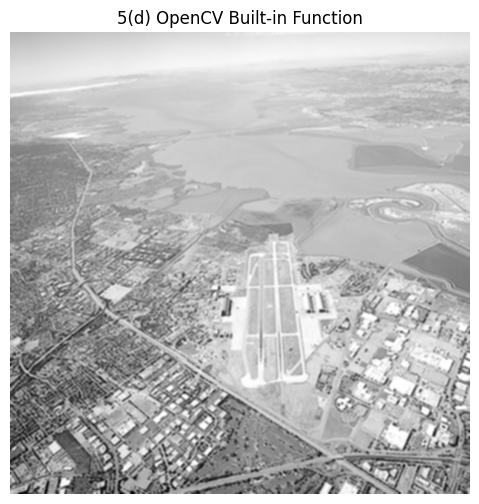

In [23]:
img = cv.imread('media/runway.png', cv.IMREAD_GRAYSCALE)
opencv_blur = cv.GaussianBlur(img, (5, 5), 2)
plt.figure(figsize=(6, 6))
plt.imshow(opencv_blur, cmap='gray')
plt.title("5(d) OpenCV Built-in Function")
plt.axis('off')
plt.show()